In [1]:
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
from celluloid import Camera

In [2]:
from codit.population.networks import query_accommodation_coords
from codit.population.networks.city_config.city_cfg import city_paras, print_city_paras
from codit.population.networks.home_locations import COORDINATES_CSV, Home, build_households_home_list

#### Here we use Leeds as an example 

In [3]:
CITY_OBSERVE = 'Leeds'

#### To query the coordinates of accommodation buildings and to build full homes list, we need two parametres in city_paras. Here we only use Leeds as an example for demonstration
Total population estimate of Leeds (2019) Source: ONS* https://observatory.leeds.gov.uk/population/


In [4]:
print_city_paras(city_paras)

Leeds
population : 793139
area_str : area['ISO3166-2'='GB-LDS'][admin_level=8]


#### Query coordinates of the accomodation buildings in a city with request_coords_to_csv(), the 'area_str' above defines the range of the coordinates we requested

This only needs to be run once to save all accommodation buildings' coordinates to coordinates.csv

In [11]:
# query_accommodation_coords.request_coords_to_csv(COORDINATES_CSV, city_paras[CITY_OBSERVE]['area_str'])

#### Collect coordinates into a list

In [6]:
coords_types = query_accommodation_coords.get_coords(COORDINATES_CSV)
coords = list(zip(*coords_types))

#### Convert coordinates into numpy array

In [7]:
X = np.array(list(zip(*coords[:2])))
len(X)

222615

#### Plot all the coordinates of accommodation buildings to the canvas

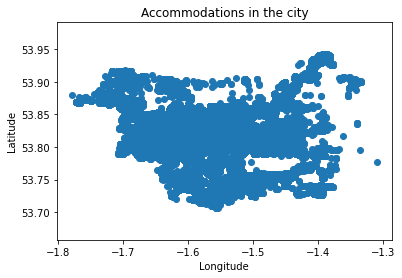

In [8]:
plt.plot(X[:, 0], X[:, 1], 'o')
plt.title('Accommodations in the city')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.axis('equal')
plt.show()

#### Plot accommodation buildings in the city as heatmap

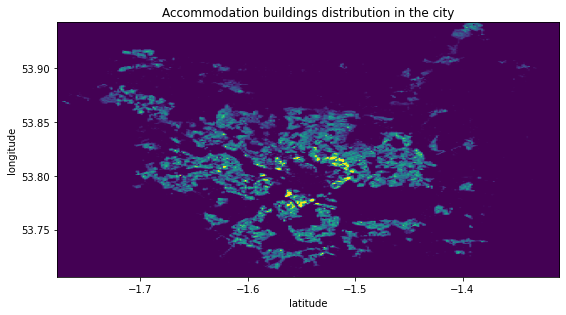

In [9]:
plt.rcParams["figure.figsize"] = [9, 5]
fig=plt.figure()
camera = Camera(fig)

heatmap, xedges, yedges = np.histogram2d(X[:, 0], X[:, 1], bins=300)
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
plt.clf()

plt.title('Accommodation buildings distribution in the city')
plt.xlabel('latitude')
plt.ylabel('longitude')

plt.imshow(heatmap.T, extent=extent, origin='lower', vmin=0, vmax=50)

plt.show()

#### Now build the full homes' specifications list, and save the result into 'full_home_list.csv'

In [10]:
df_home_list = build_households_home_list(city_paras[CITY_OBSERVE]['population'])
df_home_list

,lon,lat,building_type
0,-1.564636,53.827001,apartments
1,-1.564636,53.827001,apartments
2,-1.564636,53.827001,apartments
3,-1.564636,53.827001,apartments
4,-1.564636,53.827001,apartments
...,...,...,...
317250,-1.451100,53.823696,terrace
317251,-1.451100,53.823696,terrace
317252,-1.451100,53.823696,terrace
317253,-1.451100,53.823696,terrace
